In [1]:
#importing libraries 
import math as maths 
import numpy as np
import statsmodels.formula.api as sm
import statsmodels.api as smm
import pandas as pd
from scipy import stats  
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import mean_absolute_error
import quandl as quandl
import matplotlib.dates
import sklearn.metrics as skm

# Question 1

In [2]:
ftse=pd.read_csv("FTSE100.csv") #read data 
monthly=pd.read_excel("Monthly.xls")
ftse['Date'] = pd.to_datetime(ftse['Date'])
ftse = ftse.sort_index(axis=0, ascending=False)

ftse_returns = []
house_returns = []

#monthly returns of ftse
for i in range(len(ftse['Adj Close'])-1,0,-1):
    ftse_returns.append((ftse['Adj Close'][i-1]/ftse['Adj Close'][i])-1)

# monthly returns of monthly housing data 
for i in range(1,len(monthly["Average House Price"][0:312])):
    house_returns.append((monthly["Average House Price"][i]/monthly["Average House Price"][i-1])-1)
x=np.array(house_returns) #convert to np array
y=np.array(ftse_returns)

#calculating the correlation coefficient 
corr,_=stats.pearsonr(x,y)
print( "Correlation coefficent:",corr)
x=smm.add_constant(x) #adding a constant 
lm = smm.OLS(y,x).fit() #fit the model 
lm.summary() #print the summary 

Correlation coefficent: 0.02655129570190993


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.001
Model:                            OLS   Adj. R-squared:                 -0.003
Method:                 Least Squares   F-statistic:                    0.2180
Date:                Mon, 24 Oct 2022   Prob (F-statistic):              0.641
Time:                        17:39:42   Log-Likelihood:                 560.48
No. Observations:                 311   AIC:                            -1117.
Df Residuals:                     309   BIC:                            -1109.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0040      0.002      1.661      0.098      -0.001       0.009
x1             0.0932      0.200      0.467      0.641      -0.300       0.486
==============================================================================
Omnibus:                       12.006   Durbin-Watson:                   1.956
Prob(Omnibus):                  0.002   Jarque-Bera (JB):               12.486
Skew:                          -0.434   Prob(JB):                      0.00194
Kurtosis:                       3.458   Cond. No.                         88.0
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Text(0.5, 1.0, 'Scatterplot of FTSE against Monthly house returns')

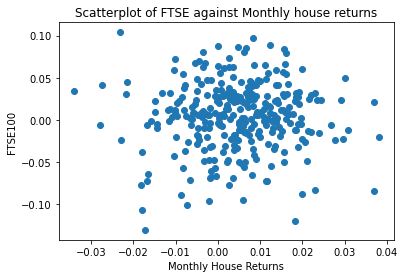

In [71]:
#plotting the actual values on a scatterplot
plt.scatter(np.array(house_returns),y,label='actual')
plt.xlabel("Monthly House Returns")
plt.ylabel("FTSE100")
plt.title("Scatterplot of FTSE against Monthly house returns")

C:\Users\Farida Eleshin\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


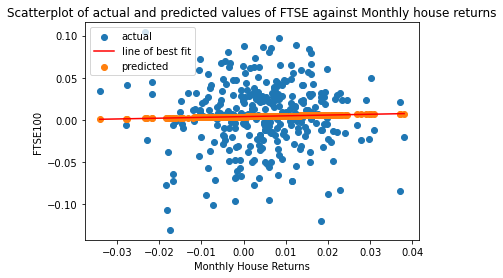

In [3]:
#plotting the actual values on a scatterplot
y_pred = 0.0932*np.array(house_returns)+0.0040
plt.scatter(np.array(house_returns),y,label='actual')
sns.lineplot(np.array(house_returns),y_pred,color='red',label='line of best fit') #plot a line of best fit 
plt.xlabel("Monthly House Returns")
plt.ylabel("FTSE100")
plt.title("Scatterplot of actual and predicted values of FTSE against Monthly house returns")
pred = lm.predict() #predictions 
#plotting a scatter of the predicted data
plt.scatter(np.array(house_returns),pred,label='predicted')
plt.legend()
plt.show()

In [4]:
#checking accuracy of model
print("Mean absolute error",skm.mean_absolute_error(pred, y))
print("Mean absolute percentage error",skm.mean_absolute_percentage_error(pred, y))

Mean absolute error 0.030685981347771306
Mean absolute percentage error 7.60660130743245


# Question 2

In [5]:
college = pd.read_csv("College.csv")
df=pd.DataFrame(college) #change data into a dataframe 
y=df['Grad.Rate']
x1=df[['Apps','Enroll','Outstate','Top10perc','Top25perc']]
x=smm.add_constant(x1) #adding a constant 
lm = smm.OLS(y,x).fit() #fitting the model 
lm.summary() #printing summary 

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              Grad.Rate   R-squared:                       0.386
Model:                            OLS   Adj. R-squared:                  0.382
Method:                 Least Squares   F-statistic:                     97.00
Date:                Mon, 24 Oct 2022   Prob (F-statistic):           2.73e-79
Time:                        17:39:57   Log-Likelihood:                -3121.9
No. Observations:                 777   AIC:                             6256.
Df Residuals:                     771   BIC:                             6284.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         35.8962      2.137     16.800      0.000      31.702      40.091
Apps           0.0008      0.000      3.005      0.003       0.000       0.001
Enroll        -0.0030      0.001     -2.828      0.005      -0.005      -0.001
Outstate       0.0017      0.000     11.124      0.000       0.001       0.002
Top10perc      0.0493      0.065      0.762      0.446      -0.078       0.176
Top25perc      0.1813      0.055      3.312      0.001       0.074       0.289
==============================================================================
Omnibus:                       23.498   Durbin-Watson:                   1.946
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               41.256
Skew:                           0.210   Prob(JB):                     1.10e-09
Kurtosis:                       4.048   Cond. No.                     5.13e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 5.13e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [6]:
y_pred=lm.predict() #making predictions using the first model 
ini_model = 0.0008*df['Apps']-0.0030*df['Enroll']+0.0017*df['Outstate']+0.0493*df['Top10perc']+0.0813*df['Top25perc']+35.8962

In [7]:
#calculation correlation coefficient of all dependent and independent variables
inds = ['Apps','Enroll','Outstate','Top10perc','Top25perc']
for ind in inds:
    corr2,_ = stats.pearsonr(df[ind],y)
    print("Correlation of ",ind,"and Grad rate: ",corr2)

Correlation of  Apps and Grad rate:  0.14675459955109232
Correlation of  Enroll and Grad rate:  -0.022341038639948452
Correlation of  Outstate and Grad rate:  0.5712899282482009
Correlation of  Top10perc and Grad rate:  0.49498923480134005
Correlation of  Top25perc and Grad rate:  0.47728116437578316


In [8]:
#elimination using stepwise, backward selection. dropping irrelevant predictor variables 
x2=df[['Apps','Enroll','Outstate','Top25perc']]
x=smm.add_constant(x2) #adding a constant 
lm2 = smm.OLS(y,x).fit() #fitting the model
lm2.summary() #print the summary info of the model 


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              Grad.Rate   R-squared:                       0.386
Model:                            OLS   Adj. R-squared:                  0.383
Method:                 Least Squares   F-statistic:                     121.2
Date:                Mon, 24 Oct 2022   Prob (F-statistic):           3.10e-80
Time:                        17:40:23   Log-Likelihood:                -3122.2
No. Observations:                 777   AIC:                             6254.
Df Residuals:                     772   BIC:                             6278.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         34.9300      1.719     20.317      0.000      31.555      38.305
Apps           0.0008      0.000      3.122      0.002       0.000       0.001
Enroll        -0.0031      0.001     -2.892      0.004      -0.005      -0.001
Outstate       0.0018      0.000     11.866      0.000       0.001       0.002
Top25perc      0.2160      0.030      7.125      0.000       0.157       0.276
==============================================================================
Omnibus:                       23.227   Durbin-Watson:                   1.950
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               41.276
Skew:                           0.202   Prob(JB):                     1.09e-09
Kurtosis:                       4.055   Cond. No.                     4.13e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 4.13e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [13]:
final_model =  0.0008*df['Apps']-0.0031*df['Enroll']+0.0018*df['Outstate']+0.2160*df['Top25perc']+34.93
y2_pred=lm2.predict() #making predictions using the final model

In [14]:
#calculating accuracy using MAPE 
#accuracy of model with all indicators 
mape = skm.mean_absolute_percentage_error(y,y_pred)*100
print("Accuracy of model with all predictor variables:",mape)

#accuracy of model with only useful predictors 
mape2 =skm.mean_absolute_percentage_error(y,y2_pred)*100
print("Accuracy of model with useful predictor variables:",mape2)

acc=np.mean(np.abs((y-y_pred)/y))*100
print(acc)

acc2=np.mean(np.abs((y-y2_pred)/y))*100
acc2

Accuracy of model with all predictor variables: 19.051288181781928
Accuracy of model with useful predictor variables: 19.071379260776585
19.05128818178193


19.071379260776595

In [15]:
print(y_pred[df.index[df['Unnamed: 0']=='Carnegie Mellon University']])
print(y2_pred[df.index[df['Unnamed: 0']=='Carnegie Mellon University']])

[89.20112305]
[89.12510268]


# Question 3

In [106]:
#reading dataset
importserv = pd.read_excel("import.xls")
transportserv = pd.read_excel("Transport services.xls")

#filling nan values with zeros
trans_data = transportserv['2020'].fillna(0)
import_data = importserv['2020'].fillna(0)
trans_test = transportserv['2021'].fillna(0)
import_test = importserv['2020'].fillna(0)

x=smm.add_constant(import_data) #adding a constant 
model = smm.OLS(trans_data,x).fit() #modelling the fit 
model.summary() #summary of model 

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   2020   R-squared:                       0.277
Model:                            OLS   Adj. R-squared:                  0.275
Method:                 Least Squares   F-statistic:                     101.3
Date:                Thu, 20 Oct 2022   Prob (F-statistic):           2.25e-20
Time:                        13:56:07   Log-Likelihood:                -1086.4
No. Observations:                 266   AIC:                             2177.
Df Residuals:                     264   BIC:                             2184.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          5.3346      1.495      3.568      0.000       2.390       8.279
2020           0.4353      0.043     10.063      0.000       0.350       0.520
==============================================================================
Omnibus:                       46.378   Durbin-Watson:                   2.057
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               94.767
Skew:                           0.881   Prob(JB):                     2.64e-21
Kurtosis:                       5.334   Cond. No.                         58.5
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Text(0.5, 1.0, 'Scatterplot of import and export transport services in 2020 ')

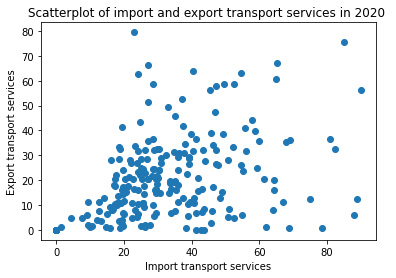

In [122]:
plt.scatter(import_data, trans_data)
plt.xlabel("Import transport services")
plt.ylabel("Export transport services")
plt.title("Scatterplot of import and export transport services in 2020 ")

In [126]:
#predicting using a test data
test_const = smm.add_constant(import_test) 
trans_pred = model.predict(pd.DataFrame(test_const))


#calculating accuracy
accc = skm.mean_absolute_percentage_error(trans_test,trans_pred)
print("Accuracy of model :",accc)


#correlation coefficient
corr2,_ = stats.pearsonr(import_data,trans_data)
print(corr2)
# print(trans_pred)

Accuracy of model : 3.709977163935171e+16
0.5265355193410698


Text(0.5, 1.0, 'Scatterplot of import and export transport services in 2021 ')

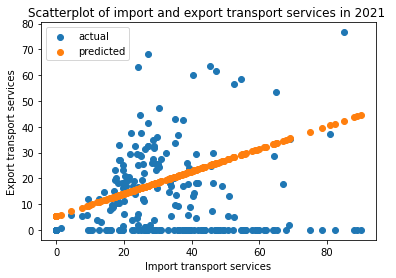

In [128]:
plt.scatter(import_test, trans_test, label='actual')
plt.scatter(import_test,trans_pred, label='predicted')
plt.legend()
plt.xlabel("Import transport services")
plt.ylabel("Export transport services")
plt.title("Scatterplot of import and export transport services in 2021 ")

# Question 4

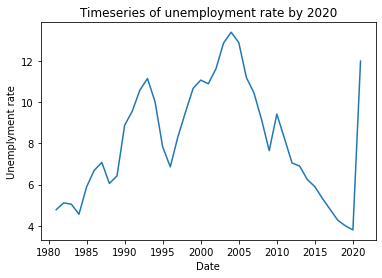

In [130]:
quandl.ApiConfig.api_key = "vrKsXM2JLae75nsLv8EH"
data = quandl.get("ODA/ISR_LUR") #getting data from quandl 
data = data.drop(data.index[41:45]) #dropping irrelevant data
#visualise the data
plt.plot(data.index,data['Value'])
plt.xlabel("Date")
plt.ylabel("Unemplyment rate")
plt.title('Timeseries of unemployment rate by 2020')
#change the dates to numbers
data.index=matplotlib.dates.date2num(data.index)

In [31]:
#modelling the linear regression model
x=data.index
x=smm.add_constant(x) #adding a constant 
model = smm.OLS(data['Value'],x).fit() #modelling the fit 
model.summary() #summary of model 

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Value   R-squared:                       0.001
Model:                            OLS   Adj. R-squared:                 -0.025
Method:                 Least Squares   F-statistic:                   0.04284
Date:                Tue, 18 Oct 2022   Prob (F-statistic):              0.837
Time:                        22:59:18   Log-Likelihood:                -99.263
No. Observations:                  41   AIC:                             202.5
Df Residuals:                      39   BIC:                             206.0
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          7.9165      1.223      6.472      0.000       5.442      10.390
x1          2.089e-05      0.000      0.207      0.837      -0.000       0.000
==============================================================================
Omnibus:                        6.830   Durbin-Watson:                   0.357
Prob(Omnibus):                  0.033   Jarque-Bera (JB):                2.337
Skew:                           0.151   Prob(JB):                        0.311
Kurtosis:                       1.870   Cond. No.                     3.40e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.4e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [32]:
# predicting the unemployment rate by 2020
model_pred=model.predict()
model_pred

array([8.00040301, 8.00802802, 8.01565303, 8.02327804, 8.03092394,
       8.03854895, 8.04617396, 8.05379897, 8.06144487, 8.06906987,
       8.07669488, 8.08431989, 8.09196579, 8.0995908 , 8.10721581,
       8.11484082, 8.12248672, 8.13011173, 8.13773673, 8.14536174,
       8.15300764, 8.16063265, 8.16825766, 8.17588267, 8.18352857,
       8.19115358, 8.19877859, 8.20640359, 8.21404949, 8.2216745 ,
       8.22929951, 8.23692452, 8.24457042, 8.25219543, 8.25982044,
       8.26744545, 8.27509135, 8.28271635, 8.29034136, 8.29796637,
       8.30561227])

In [33]:
#finding accuracy using MAPE
mape=skm.mean_absolute_percentage_error(data['Value'],model_pred)
print(mape)

acc=np.mean(np.abs((data['Value']-model_pred)/data['Value']))*100
print(acc)


0.3423062774977925
34.23062774977926


In [133]:
#prediction for 2020
model_pred[-1]

8.305612271280609